In [1]:
import torch as t
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

## Loading and Pre-Processing Data

In [2]:
data_transformation = transforms.Compose([
     transforms.Resize((64,64)), 
                ToTensor(),
])
dataset = ImageFolder(root="../data/flowers-102/flowers/train/", transform=data_transformation) #Oxford Flowers - 102

In [3]:
print(f"{dataset}")

Dataset ImageFolder
    Number of datapoints: 6552
    Root location: ../data/flowers-102/flowers/train/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


## Class Names

In [4]:
import json

with open("../data/flowers-102/cat_to_name.json", "r") as f:
    class_names = json.load(f)
    
class_names = {int(u):str(v) for u,v in class_names.items()}
class_names

{21: 'fire lily',
 3: 'canterbury bells',
 45: 'bolero deep blue',
 1: 'pink primrose',
 34: 'mexican aster',
 27: 'prince of wales feathers',
 7: 'moon orchid',
 16: 'globe-flower',
 25: 'grape hyacinth',
 26: 'corn poppy',
 79: 'toad lily',
 39: 'siam tulip',
 24: 'red ginger',
 67: 'spring crocus',
 35: 'alpine sea holly',
 32: 'garden phlox',
 10: 'globe thistle',
 6: 'tiger lily',
 93: 'ball moss',
 33: 'love in the mist',
 9: 'monkshood',
 102: 'blackberry lily',
 14: 'spear thistle',
 19: 'balloon flower',
 100: 'blanket flower',
 13: 'king protea',
 49: 'oxeye daisy',
 15: 'yellow iris',
 61: 'cautleya spicata',
 31: 'carnation',
 64: 'silverbush',
 68: 'bearded iris',
 63: 'black-eyed susan',
 69: 'windflower',
 62: 'japanese anemone',
 20: 'giant white arum lily',
 38: 'great masterwort',
 4: 'sweet pea',
 86: 'tree mallow',
 101: 'trumpet creeper',
 42: 'daffodil',
 22: 'pincushion flower',
 2: 'hard-leaved pocket orchid',
 54: 'sunflower',
 66: 'osteospermum',
 70: 'tree po

## DataLoaders

In [5]:

Batch_size = 10
n_wokers = 4
dataloader = DataLoader(dataset=dataset, batch_size= Batch_size, num_workers=n_wokers, pin_memory=True, shuffle=True)

## Function to Calculate Mean and STD Deviation to Normalize Data.

In [6]:
def mean_std_calculator(loader):
    
    mean = t.zeros(3)
    std = t.zeros(3)
    total_images = 0

    for images, _ in loader:
        # images shape: [B, C, H, W]
        batch_samples = images.size(0)
        images = images.view(batch_samples, images.size(1), -1)

        mean += images.mean(2).sum(0)
        std  += images.std(2).sum(0)
        total_images += batch_samples

    mean /= total_images
    std  /= total_images

    print("Mean:", mean)
    print("Std:", std)

In [7]:
mean_std_calculator(dataloader)

Mean: tensor([0.4353, 0.3773, 0.2871])
Std: tensor([0.2526, 0.1980, 0.2044])


## Random Image Plotter, to view the Dataset Images

In [8]:
def plotter(loader):
    import matplotlib.pyplot as plt
    
    x = next(iter(loader))[0]
    x = x.permute(0, 2, 3, 1).numpy() #Converts to [B, H, W, C]
    
    n = x.shape[0]
    
    plt.figure(figsize=(15,4))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)

        ax.imshow(x[i])
        ax.axis("off")
    plt.show()

### Oxford Flowers-102 Dataset

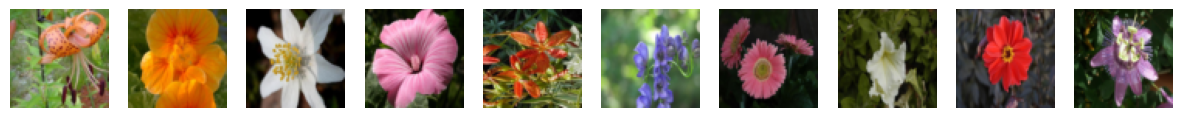

In [9]:
plotter(dataloader)